In [2]:
%run Importaciones.ipynb
%run Variables_Clases.ipynb

###  He elegido la normalizacion de los datos con MinMax para que el rango de los valores seas coherente. asi la comparacion sera mas acertada. valores similares y coherentes entre si




In [3]:
experimento_4_clean = pd.read_csv('../datos/experimento_4_clean.csv', sep=',')
experimento_3_clean = pd.read_csv('../datos/experimento_3_clean.csv', sep=',')
experimento_2_clean = pd.read_csv('../datos/experimento_2_clean.csv', sep=',')
experimento_1_clean = pd.read_csv('../datos/experimento_1_clean.csv', sep=',')


experimentos = [experimento_1_clean, experimento_2_clean, experimento_3_clean, experimento_4_clean]

In [4]:
display(experimento_4_clean)

,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,123009,48,21,468675,174202,8577,19305,17146,23426,29425,10122,4
1,123120,47,30,98163,25886,18034,23444,10977,18521,15862,14097,0
2,124618,40,38,111774,21909,6006,1006,6429,3344,7732,1616,0
3,125430,37,50,142530,22248,9191,6086,5007,7385,5564,3634,0
4,125981,48,54,58951,4755,965,1237,3029,4567,3496,983,0
...,...,...,...,...,...,...,...,...,...,...,...,...
211,348567,81,37,4088,13782,756,5536,7114,24230,12942,14061,2
212,355018,84,20,3490,13947,2299,2051,3315,22789,17542,9966,2
213,358034,84,38,3619,8525,5623,6665,5345,31352,22837,12553,2
214,361108,83,51,116972,5464,1405,6395,2285,7186,5351,1219,2


In [5]:
# Lista que contendrá los DataFrames filtrados
exp_filtrados = []

# Iterar sobre los dataframes y aplicar la operación de filtrado a cada uno de ellos
for exp in experimentos:
    # Filtro el DataFrame para dejar fuera las columnas especificadas
    exp_filtrado = exp.drop(['Timestamp', 'Key'], axis=1)
    
    # Agregar el DataFrame filtrado a la lista
    exp_filtrados.append(exp_filtrado)


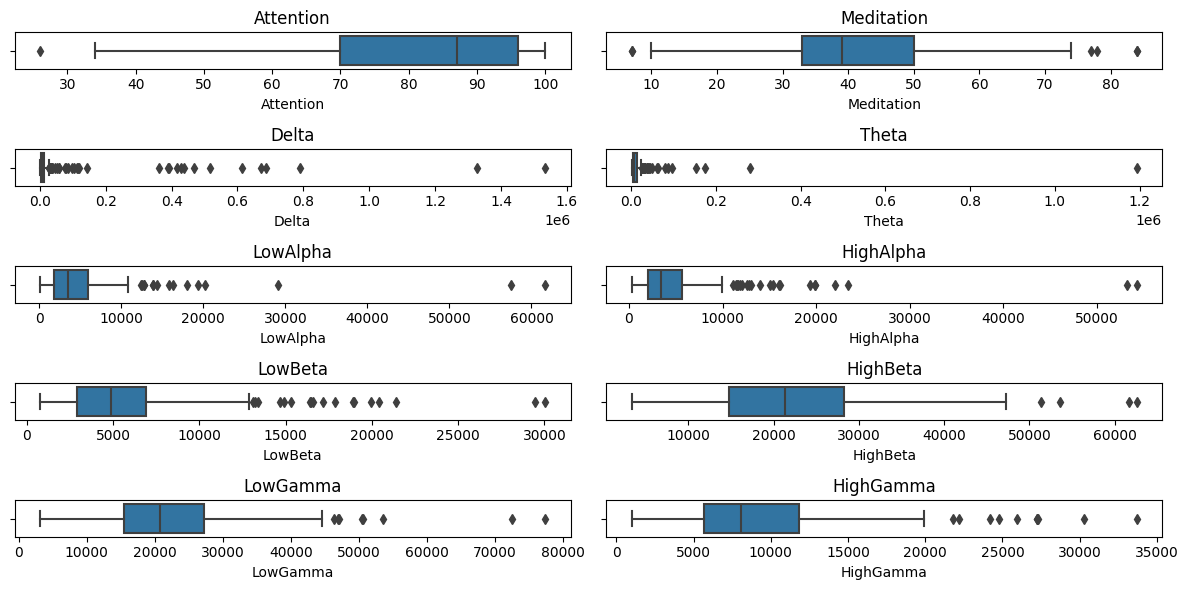

In [6]:
#https://medium.com/@martacasdelg/c%C3%B3mo-identificar-y-tratar-outliers-con-python-bf7dd530fc3
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
    
# Filtro el DataFrame para dejar fuera las columnas especificadas
experimento_4_filtrado = experimento_4_clean.drop(['Timestamp', 'Key'], axis=1)

# Calcul0 el número de filas necesarias para mostrar dos boxplots por fila
num_cols = len(experimento_4_filtrado.columns)
num_rows = (num_cols) // 2

# Definir el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iterar sobre cada columna del DataFrame filtrado
for i, column in enumerate(experimento_4_filtrado.columns):
    # Crear un subplot para cada columna
    plt.subplot(num_rows, 2, i + 1)
    
    # Trazar un boxplot para la columna actual
    sns.boxplot(data=experimento_4_filtrado, x=column)
    
    # Establecer el título del subplot como el nombre de la columna
    plt.title(column)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [7]:
#https://medium.com/@martacasdelg/c%C3%B3mo-identificar-y-tratar-outliers-con-python-bf7dd530fc3

# Calculate z-score for each data point and compute its absolute value
z_scores = zscore(experimento_4_filtrado['Delta'])
abs_z_scores = np.abs(z_scores)

# Select the outliers using a threshold of 3
outliers = experimento_4_filtrado[abs_z_scores > 3]
#print(f'Number of outliers: {len(outliers)}')

### umbral Zcore https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

### Con 3   99.7%
### Con 3.5 99.95%
### Con 4   99.993%

In [8]:
exp_outliners = []

# Iterar sobre los dataframes y aplicar el proceso a cada uno de ellos
for exp in exp_filtrados:
    
    # Calcular el z-score para cada valor en el DataFrame
    z_scores = stats.zscore(exp)

    # Definir un umbral para los z-scores que considerarás como outliers
    umbral_zscore = 3

    # Detectar outliers basados en el z-score (valores cuyo valor absoluto de z-score es mayor que el umbral)
    outliers = (abs(z_scores) > umbral_zscore)

    # Contar el número de outliers en cada columna
    num_outliers_por_columna = outliers.sum(axis=0)

    # Obtener las filas y sus índices que son outliers en cada columna
    outliers_por_columna = {}
    for column in exp.columns:
        outliers_index = outliers[outliers[column]].index
        outliers_por_columna[column] = outliers_index

    # Imprimir el número de outliers por cada columna
    print("Número de outliers por columna:")
    print(num_outliers_por_columna)

    # Imprimir las filas con sus índices que son outliers en cada columna
    print("\nFilas con sus índices que son outliers por columna:")
    for column, indices in outliers_por_columna.items():
        print(f"Columna '{column}': {list(zip(indices, exp.loc[indices][column]))}")

    # Lista para almacenar todos los índices de outliers
    todos_indices_outliers = []

    # Almacenar todos los índices de outliers en una lista
    for indices in outliers_por_columna.values():
        todos_indices_outliers.extend(indices)

    # Convertir la lista de índices a un conjunto para eliminar duplicados
    conjunto_indices_outliers = set(todos_indices_outliers)

    # Lista ordenada de los índices únicos que no se repiten
    indices_unicos_ordenados = sorted(list(conjunto_indices_outliers))

    # Imprimir los índices únicos ordenados
    print("Índices únicos de outliers ordenados:")
    print(len(indices_unicos_ordenados))
    print(indices_unicos_ordenados)

    # Construir un nuevo DataFrame que contenga las filas correspondientes a los índices únicos ordenados
    dataframe_outliers = exp.loc[indices_unicos_ordenados]

    # Imprimir el nuevo DataFrame de filas outliers únicas
    print("Nuevo DataFrame de filas outliers únicas:")
    display(dataframe_outliers)
    
    # Agregar el DataFrame filtrado a la lista
    exp_outliners.append(indices_unicos_ordenados)



Número de outliers por columna:
Attention     0
Meditation    0
Delta         3
Theta         3
LowAlpha      3
HighAlpha     3
LowBeta       2
HighBeta      3
LowGamma      1
HighGamma     1
dtype: int64

Filas con sus índices que son outliers por columna:
Columna 'Attention': []
Columna 'Meditation': []
Columna 'Delta': [(10, 2713787), (36, 2509770), (48, 1651443)]
Columna 'Theta': [(9, 316379), (23, 559755), (71, 266549)]
Columna 'LowAlpha': [(9, 87065), (23, 120068), (71, 214196)]
Columna 'HighAlpha': [(23, 114826), (36, 54455), (71, 107628)]
Columna 'LowBeta': [(23, 42514), (126, 19177)]
Columna 'HighBeta': [(10, 27507), (23, 22185), (71, 37385)]
Columna 'LowGamma': [(9, 16701)]
Columna 'HighGamma': [(2, 23072)]
Índices únicos de outliers ordenados:
8
[2, 9, 10, 23, 36, 48, 71, 126]
Nuevo DataFrame de filas outliers únicas:


,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma
2,66,75,102896,14838,12817,8565,2890,14525,9144,23072
9,77,44,1284256,316379,87065,44605,12994,13046,16701,5478
10,77,44,2713787,64145,9239,39990,6864,27507,8148,1871
23,66,35,669489,559755,120068,114826,42514,22185,8924,3421
36,77,81,2509770,199864,7055,54455,12754,13729,1965,1023
48,51,66,1651443,41823,5435,21847,14552,7548,4459,1211
71,60,83,25966,266549,214196,107628,3132,37385,7509,4963
126,26,70,1431455,191911,25346,20877,19177,10307,5557,7580


Número de outliers por columna:
Attention     0
Meditation    0
Delta         5
Theta         2
LowAlpha      3
HighAlpha     3
LowBeta       2
HighBeta      3
LowGamma      5
HighGamma     3
dtype: int64

Filas con sus índices que son outliers por columna:
Columna 'Attention': []
Columna 'Meditation': []
Columna 'Delta': [(4, 1604977), (45, 1637280), (105, 2753863), (125, 1868336), (130, 1994091)]
Columna 'Theta': [(109, 573989), (125, 1250458)]
Columna 'LowAlpha': [(45, 159624), (104, 300342), (125, 410090)]
Columna 'HighAlpha': [(45, 288898), (104, 296756), (125, 453424)]
Columna 'LowBeta': [(125, 278131), (144, 85017)]
Columna 'HighBeta': [(104, 79393), (125, 123077), (144, 52700)]
Columna 'LowGamma': [(28, 26554), (66, 39938), (68, 27497), (104, 28369), (125, 29640)]
Columna 'HighGamma': [(28, 22583), (84, 21654), (125, 22439)]
Índices únicos de outliers ordenados:
12
[4, 28, 45, 66, 68, 84, 104, 105, 109, 125, 130, 144]
Nuevo DataFrame de filas outliers únicas:


,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma
4,78,41,1604977,14633,12696,16053,6760,9906,2845,3335
28,43,60,66194,139861,5830,4703,8379,12361,26554,22583
45,64,50,1637280,158953,159624,288898,48919,48601,8242,3260
66,63,37,16209,4921,4999,3233,14611,21892,39938,12153
68,84,48,10564,4709,6844,5821,8706,14052,27497,6183
84,100,37,82556,21165,14514,17444,9469,13142,17202,21654
104,38,74,448865,213379,300342,296756,69716,79393,28369,10531
105,38,74,2753863,205412,22007,28902,28051,10332,6386,2372
109,48,75,944208,573989,51946,33259,23459,24339,7842,2063
125,44,60,1868336,1250458,410090,453424,278131,123077,29640,22439


Número de outliers por columna:
Attention     0
Meditation    0
Delta         5
Theta         3
LowAlpha      1
HighAlpha     2
LowBeta       1
HighBeta      3
LowGamma      3
HighGamma     3
dtype: int64

Filas con sus índices que son outliers por columna:
Columna 'Attention': []
Columna 'Meditation': []
Columna 'Delta': [(84, 1382383), (147, 1731425), (187, 1449178), (188, 1021039), (201, 903603)]
Columna 'Theta': [(6, 443169), (107, 489374), (147, 896635)]
Columna 'LowAlpha': [(147, 550828)]
Columna 'HighAlpha': [(147, 582958), (167, 175048)]
Columna 'LowBeta': [(147, 1433520)]
Columna 'HighBeta': [(6, 96100), (107, 97570), (147, 312986)]
Columna 'LowGamma': [(7, 62519), (47, 101984), (147, 173018)]
Columna 'HighGamma': [(7, 43765), (47, 41397), (147, 155568)]
Índices únicos de outliers ordenados:
10
[6, 7, 47, 84, 107, 147, 167, 187, 188, 201]
Nuevo DataFrame de filas outliers únicas:


,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma
6,83,75,536923,443169,21136,58863,91896,96100,7605,1952
7,83,75,526439,97472,72700,45741,61280,62291,62519,43765
47,44,35,819911,115107,85314,22893,30921,70932,101984,41397
84,63,41,1382383,27465,14308,6290,25695,7477,1551,1958
107,70,35,472388,489374,23813,111390,112562,97570,29678,34642
147,69,61,1731425,896635,550828,582958,1433520,312986,173018,155568
167,51,60,703020,108260,130737,175048,39204,43034,26917,4493
187,11,34,1449178,160453,12355,23053,14337,4508,4992,4543
188,8,17,1021039,116763,40505,43621,80358,40815,18653,14084
201,23,69,903603,33652,3135,6086,5988,1621,1848,854


Número de outliers por columna:
Attention     1
Meditation    2
Delta         6
Theta         2
LowAlpha      3
HighAlpha     2
LowBeta       4
HighBeta      2
LowGamma      2
HighGamma     6
dtype: int64

Filas con sus índices que son outliers por columna:
Columna 'Attention': [(8, 26)]
Columna 'Meditation': [(166, 84), (167, 84)]
Columna 'Delta': [(5, 1534038), (6, 789006), (7, 686906), (8, 1326790), (76, 671721), (107, 613097)]
Columna 'Theta': [(6, 1193321), (8, 279322)]
Columna 'LowAlpha': [(6, 57484), (7, 61679), (185, 29157)]
Columna 'HighAlpha': [(6, 53216), (7, 54283)]
Columna 'LowBeta': [(5, 21396), (6, 29428), (7, 20426), (158, 30044)]
Columna 'HighBeta': [(46, 61630), (134, 62594)]
Columna 'LowGamma': [(6, 77430), (160, 72479)]
Columna 'HighGamma': [(6, 27249), (111, 27253), (155, 27304), (168, 33696), (193, 30255), (195, 25945)]
Índices únicos de outliers ordenados:
18
[5, 6, 7, 8, 46, 76, 107, 111, 134, 155, 158, 160, 166, 167, 168, 185, 193, 195]
Nuevo DataFrame de filas

,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma
5,47,37,1534038,152404,19379,22001,21396,32967,50509,24748
6,37,24,789006,1193321,57484,53216,29428,40296,77430,27249
7,38,38,686906,42779,61679,54283,20426,43808,24538,9409
8,26,30,1326790,279322,12760,19910,8375,35570,43579,11082
46,100,24,9303,8957,16297,1812,5697,61630,9273,8682
76,97,40,671721,10959,2126,1892,2215,23489,18679,16070
107,64,30,613097,85820,3150,12813,11893,26182,11938,6236
111,90,48,8086,4493,3181,2349,1318,18698,24448,27253
134,100,34,9946,9267,4812,3840,4732,62594,43031,5430
155,54,54,2225,20560,1056,2488,856,36452,31645,27304


In [9]:
print(len(exp_outliners))

4


In [10]:

exp_sin_outliners = []

# Iterar sobre los dataframes y aplicar el proceso a cada uno de ellos
for exp, out in zip(experimentos, exp_outliners) :

    exp_sin_outliner = exp.drop(out)

    exp_sin_outliner = exp_sin_outliner.reset_index(drop=True)

    exp_sin_outliners.append(exp_sin_outliner)




In [11]:

def normalizar_dataframe(dataframe):
    # Selecciono las columnas a normalizar
    columnas = ['Attention', 'Meditation', 'Delta', 'Theta', 'LowAlpha', 'HighAlpha', 'LowBeta', 'HighBeta', 'LowGamma', 'HighGamma']

    # Normalizo las columnas seleccionadas
    dataframe[columnas] = MinMaxScaler().fit_transform(dataframe[columnas])
    
    return dataframe

# Normalizar los 4 DataFrames diferentes de entrada y de salida
experimento_1_minmax = normalizar_dataframe(exp_sin_outliners[0])
experimento_2_minmax = normalizar_dataframe(exp_sin_outliners[1])
experimento_3_minmax = normalizar_dataframe(exp_sin_outliners[2])
experimento_4_minmax = normalizar_dataframe(exp_sin_outliners[3])


In [12]:
display (experimento_4_minmax.head())


,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,123009,0.212121,0.197183,0.909687,1.000000,0.421642,0.820364,0.853637,0.399729,0.521073,0.394126,4
1,123120,0.196970,0.323944,0.189085,0.144601,0.892585,1.000000,0.532201,0.302096,0.252200,0.565551,0
2,124618,0.090909,0.436620,0.215557,0.121664,0.293611,0.026171,0.295227,0.000000,0.091032,0.027299,0
3,125430,0.045455,0.605634,0.275374,0.123619,0.452219,0.246647,0.221134,0.080436,0.048053,0.114326,0
4,125981,0.212121,0.661972,0.112823,0.022729,0.042578,0.036196,0.118070,0.024344,0.007057,0.000000,0


In [13]:
experimento_1_minmax.to_csv('../datos/experimento_1_nor.csv', index=False)
experimento_2_minmax.to_csv('../datos/experimento_2_nor.csv', index=False)
experimento_3_minmax.to_csv('../datos/experimento_3_nor.csv', index=False)
experimento_4_minmax.to_csv('../datos/experimento_4_nor.csv', index=False)
experimento_all_minmax = pd.concat([experimento_1_minmax, experimento_2_minmax, experimento_3_minmax, experimento_4_minmax])

# Guardar el resultado en un archivo CSV
experimento_all_minmax.to_csv('../datos/experimento_all_nor.csv', index=False) 

print()
print(color.BOLD +  color.UNDERLINE + color.RED + "Exporto todos los experimentos a un csv para tratarlo despues" + color.END )
print()
print(color.BOLD +  color.UNDERLINE + color.RED + "Exporto todos los experimentos a varios csv para tratarlos despues" + color.END )
print()



Exporto todos los experimentos a un csv para tratarlo despues

Exporto todos los experimentos a varios csv para tratarlos despues



### Correlaciones ###

In [14]:
experimento_1_minmax.corr()

,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
Timestamp,1.000000,-0.396312,0.257554,0.047377,-0.016440,0.014142,-0.001029,0.031989,-0.259563,-0.224510,-0.156138,0.052689
Attention,-0.396312,1.000000,-0.301875,-0.093399,-0.188227,-0.189731,-0.116186,-0.063625,0.340478,0.126679,0.225351,0.054630
Meditation,0.257554,-0.301875,1.000000,-0.003696,-0.036430,0.021610,0.035101,-0.179950,-0.297378,-0.066128,-0.170612,0.413242
Delta,0.047377,-0.093399,-0.003696,1.000000,0.610057,0.475226,0.410283,0.287155,0.083026,-0.154588,-0.125435,-0.330086
Theta,-0.016440,-0.188227,-0.036430,0.610057,1.000000,0.658636,0.286405,0.447481,0.220511,0.031279,0.115851,-0.302241
LowAlpha,0.014142,-0.189731,0.021610,0.475226,0.658636,1.000000,0.545237,0.584649,0.359691,0.144221,0.138462,-0.204070
HighAlpha,-0.001029,-0.116186,0.035101,0.410283,0.286405,0.545237,1.000000,0.264402,0.166738,0.114276,0.096735,-0.152785
LowBeta,0.031989,-0.063625,-0.179950,0.287155,0.447481,0.584649,0.264402,1.000000,0.343194,0.201235,0.300921,-0.211738
HighBeta,-0.259563,0.340478,-0.297378,0.083026,0.220511,0.359691,0.166738,0.343194,1.000000,0.458115,0.527482,-0.181757
LowGamma,-0.224510,0.126679,-0.066128,-0.154588,0.031279,0.144221,0.114276,0.201235,0.458115,1.000000,0.573907,-0.024535


<Axes: >

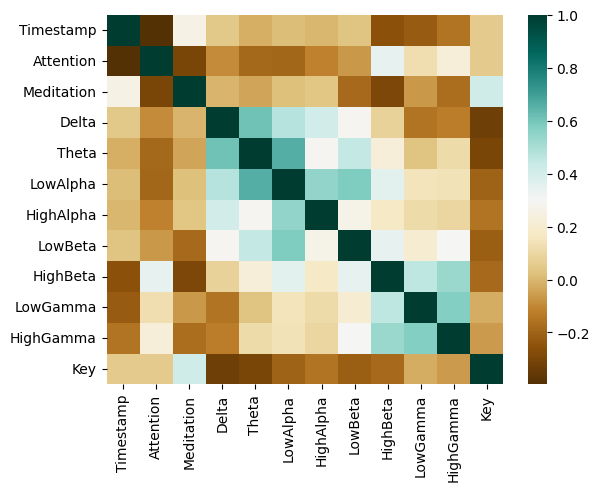

In [15]:
import seaborn as sns
sns.heatmap(experimento_1_minmax.corr(), cmap="BrBG") 

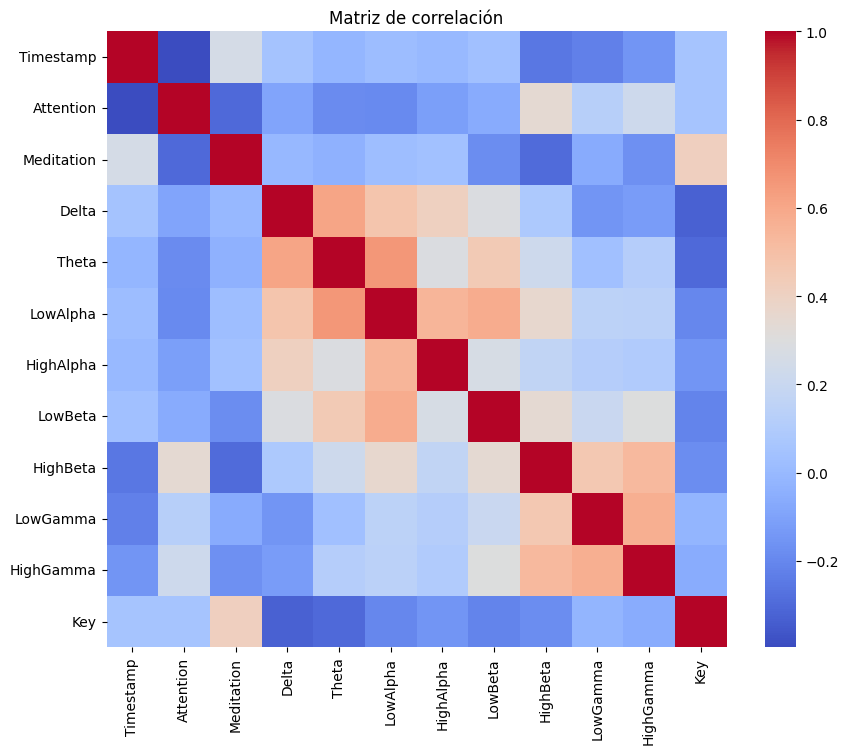

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(experimento_1_minmax.corr(),cmap='coolwarm')

plt.title('Matriz de correlación')

plt.show()

In [17]:
matriz_correlacion = experimento_1_minmax.corr()

In [18]:
matriz_correlacion

,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
Timestamp,1.000000,-0.396312,0.257554,0.047377,-0.016440,0.014142,-0.001029,0.031989,-0.259563,-0.224510,-0.156138,0.052689
Attention,-0.396312,1.000000,-0.301875,-0.093399,-0.188227,-0.189731,-0.116186,-0.063625,0.340478,0.126679,0.225351,0.054630
Meditation,0.257554,-0.301875,1.000000,-0.003696,-0.036430,0.021610,0.035101,-0.179950,-0.297378,-0.066128,-0.170612,0.413242
Delta,0.047377,-0.093399,-0.003696,1.000000,0.610057,0.475226,0.410283,0.287155,0.083026,-0.154588,-0.125435,-0.330086
Theta,-0.016440,-0.188227,-0.036430,0.610057,1.000000,0.658636,0.286405,0.447481,0.220511,0.031279,0.115851,-0.302241
LowAlpha,0.014142,-0.189731,0.021610,0.475226,0.658636,1.000000,0.545237,0.584649,0.359691,0.144221,0.138462,-0.204070
HighAlpha,-0.001029,-0.116186,0.035101,0.410283,0.286405,0.545237,1.000000,0.264402,0.166738,0.114276,0.096735,-0.152785
LowBeta,0.031989,-0.063625,-0.179950,0.287155,0.447481,0.584649,0.264402,1.000000,0.343194,0.201235,0.300921,-0.211738
HighBeta,-0.259563,0.340478,-0.297378,0.083026,0.220511,0.359691,0.166738,0.343194,1.000000,0.458115,0.527482,-0.181757
LowGamma,-0.224510,0.126679,-0.066128,-0.154588,0.031279,0.144221,0.114276,0.201235,0.458115,1.000000,0.573907,-0.024535


In [19]:

matriz_correlacion = experimento_1_minmax.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(5).index
componentes_peores = suma_correlaciones.nsmallest(5).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

Las dos columnas seleccionadas para PCA son: Index(['LowAlpha', 'HighBeta', 'LowBeta', 'Theta', 'Delta'], dtype='object')
Las dos columnas seleccionadas con la peor correlación son: Index(['Timestamp', 'Meditation', 'Key', 'Attention', 'LowGamma'], dtype='object')


In [20]:

matriz_correlacion = experimento_2_minmax.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(5).index
componentes_peores = suma_correlaciones.nsmallest(5).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

Las dos columnas seleccionadas para PCA son: Index(['Theta', 'LowAlpha', 'HighAlpha', 'LowBeta', 'Delta'], dtype='object')
Las dos columnas seleccionadas con la peor correlación son: Index(['Timestamp', 'Meditation', 'Key', 'Attention', 'HighGamma'], dtype='object')


In [21]:

matriz_correlacion = experimento_3_minmax.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(5).index
componentes_peores = suma_correlaciones.nsmallest(5).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

Las dos columnas seleccionadas para PCA son: Index(['LowAlpha', 'HighBeta', 'LowBeta', 'Theta', 'LowGamma'], dtype='object')
Las dos columnas seleccionadas con la peor correlación son: Index(['Timestamp', 'Meditation', 'Key', 'Attention', 'HighGamma'], dtype='object')


In [22]:

matriz_correlacion = experimento_4_minmax.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(5).index
componentes_peores = suma_correlaciones.nsmallest(5).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

Las dos columnas seleccionadas para PCA son: Index(['Attention', 'Theta', 'HighAlpha', 'Delta', 'LowBeta'], dtype='object')
Las dos columnas seleccionadas con la peor correlación son: Index(['Key', 'HighGamma', 'LowGamma', 'HighBeta', 'Timestamp'], dtype='object')


In [23]:

matriz_correlacion = experimento_all_minmax.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(5).index
componentes_peores = suma_correlaciones.nsmallest(5).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

Las dos columnas seleccionadas para PCA son: Index(['LowBeta', 'LowAlpha', 'HighAlpha', 'HighBeta', 'Theta'], dtype='object')
Las dos columnas seleccionadas con la peor correlación son: Index(['Meditation', 'Key', 'Timestamp', 'Attention', 'HighGamma'], dtype='object')


In [24]:
experimento_all_minmax_1 = experimento_all_minmax.drop(['Timestamp', 'Meditation', 'Attention','LowGamma', 'HighGamma'], axis=1)

In [25]:
experimento_all_minmax_1.head()

,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,Key
0,0.021185,0.079462,0.061727,0.076266,0.100597,0.548819,4
1,0.003739,0.027162,0.164694,0.255753,0.034888,0.340997,0
2,0.049114,0.069893,0.113457,0.095536,0.189586,0.584612,0
3,0.018012,0.420046,0.210478,0.178815,0.294905,0.059359,0
4,0.001672,0.006495,0.009676,0.000955,0.063348,0.080122,0


In [26]:

matriz_correlacion = experimento_all_minmax_1.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(4).index
componentes_peores = suma_correlaciones.nsmallest(4).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

Las dos columnas seleccionadas para PCA son: Index(['LowAlpha', 'Theta', 'HighAlpha', 'LowBeta'], dtype='object')
Las dos columnas seleccionadas con la peor correlación son: Index(['Key', 'HighBeta', 'Delta', 'LowBeta'], dtype='object')


In [27]:
'''
sns.pairplot(matriz_correlacion, height=2.5)
plt.tight_layout()
plt.show()
'''

'\nsns.pairplot(matriz_correlacion, height=2.5)\nplt.tight_layout()\nplt.show()\n'

In [28]:
'''
sns.pairplot(
    matriz_correlacion, kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}}
)
plt.tight_layout()
plt.show()

'''

"\nsns.pairplot(\n    matriz_correlacion, kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}}\n)\nplt.tight_layout()\nplt.show()\n\n"